# Thu thập dữ liệu từ Facebook
Sau khi đã thu thập dữ liệu, ta cần xử lí dữ liệu để dữ liệu dễ đọc và dễ phân tích hơn. Ta sẽ thực hiện một số trực quan hóa để xem sự phân bổ dữ liệu và mối quan hệ giữa các dữ liệu. Ta cũng có thể thực hiện một số thao tác để lọc những dữ liệu không cần thiết

In [89]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Làm sạch và tiền xử lí dữ liệu
Dữ liệu sau khi lấy về có thể chứa nhiều khuyết thiếu do lỗi của công cụ hay do bản thân bài đăng của Fanpage không có dữ liệu (không có nội dung, không có bình luận, hạn chế quyền truy cập...). Do vậy cần xử lí những trường hợp này để được bộ dữ liệu được hợp lí và hiệu quả cho việc phân tích dữ liệu

In [91]:
df = pd.read_csv('Data/tusachchualanh.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        150 non-null    int64  
 1   text                           148 non-null    object 
 2   post_text                      148 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           150 non-null    object 
 6   timestamp                      150 non-null    int64  
 7   image                          93 non-null     object 
 8   image_lowquality               149 non-null    object 
 9   images                         150 non-null    object 
 10  images_description             150 non-null    object 
 11  images_lowquality              150 non-null    object 
 12  images_lowquality_description  150 non-null    obj

In [93]:
# Loại bỏ những cột không chứa giá trị hoặc không cần thiết
df = df.dropna(how='all', axis='columns')
df = df.drop(columns=['text','timestamp','video','video_id','image','image_lowquality','post_url','page_id',
                      'images','images_description','images_lowquality','images_lowquality_description', 'link',
                      'video_thumbnail','fetched_time','w3_fb_url','likes','user_id','user_url','available',
                      'was_live','is_live','image_id','video_ids','videos','links','username','image_ids'])

In [94]:
df = df.dropna(subset=['post_text','reactions'])

In [95]:
# Sửa lại giá trị thời gian cho đúng múi giờ
df['time'] = df['time'].astype('datetime64[ns]')
df['time'] = df['time'] + pd.Timedelta(hours=7)

In [96]:
df = df.reset_index(drop=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         126 non-null    int64         
 1   post_text       126 non-null    object        
 2   time            126 non-null    datetime64[ns]
 3   comments        126 non-null    int64         
 4   shares          126 non-null    int64         
 5   comments_full   126 non-null    object        
 6   reactors        126 non-null    object        
 7   reactions       126 non-null    object        
 8   reaction_count  126 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 9.0+ KB


## Phân tích reactions

Để việc phân tích dễ dàng hơn, đầu tiên ta cần tổ chức lại dữ liệu đã thu thập được cho hợp lí

In [98]:
# Chuyển cột reactions thành một list các từ điển
reactions = []
for i in range(len(df)):
    row = df.iloc[i]
    reaction = dict(eval(row['reactions']))
    reaction["Chia sẻ"] = row['shares']
    reaction["Bình luận"] = row['comments']
    reaction['Tổng lượt tương tác'] = row['shares'] + row['comments'] + row['reaction_count']
    reactions.append(reaction)

#### Kiểu reactions nào chiếm ưu thế trong các bài viết?

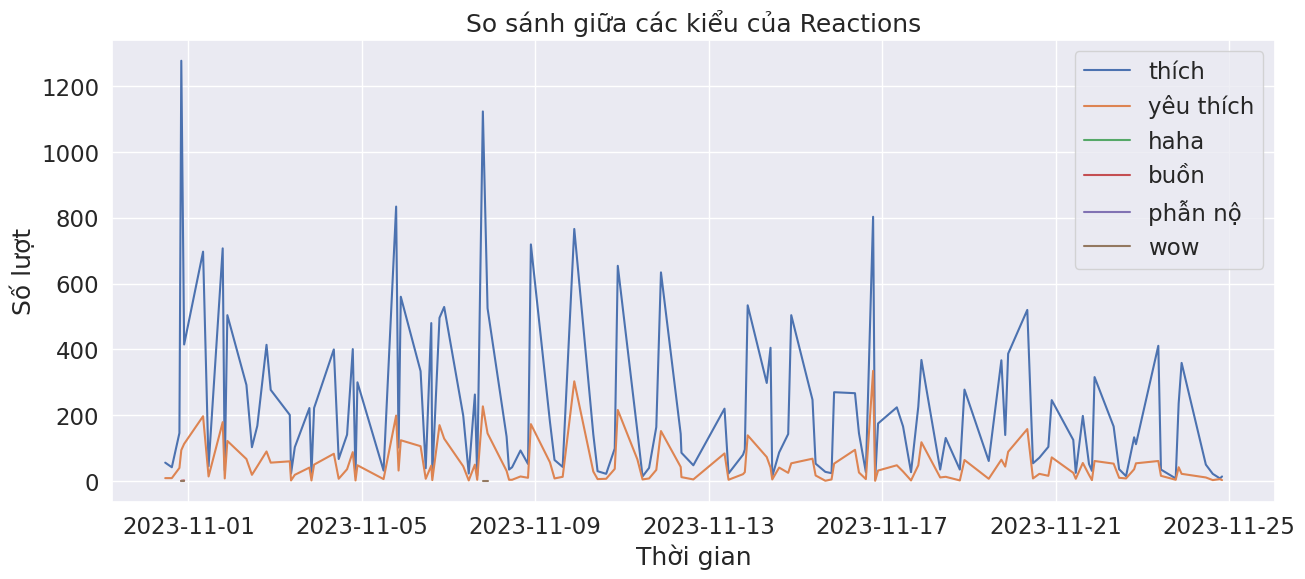

In [99]:
reactions_df = pd.DataFrame(reactions)
reactions_df['time'] = df['time']
columns = ['thích','yêu thích','haha','buồn','phẫn nộ','wow']
plt.figure(figsize=(15, 6))
for column in columns:
    plt.plot(reactions_df['time'], reactions_df[column], label=column)
plt.xlabel('Thời gian')
plt.ylabel('Số lượt')
plt.title('So sánh giữa các kiểu của Reactions')
plt.legend()
plt.show()


#### Đâu là bài đăng có lượt tương tác cao nhất?

In [100]:
index = max(range(len(reactions)), key=lambda i: reactions[i]['Tổng lượt tương tác'])
df.iloc[index]

post_id                                             348504731097722
post_text         Giọng điệu, tiếng bước chân, tiếng đóng cửa - ...
time                                            2023-11-07 19:00:01
comments                                                         38
shares                                                           96
comments_full     [{'comment_id': '180385631810354', 'comment_ur...
reactors          [{'name': 'Như Mộng', 'link': 'https://faceboo...
reactions         {'thích': 1123, 'yêu thích': 227, 'haha': 5, '...
reaction_count                                                 1363
Name: 84, dtype: object

In [101]:
reactions[index]

{'thích': 1123,
 'yêu thích': 227,
 'haha': 5,
 'wow': 1,
 'thương thương': 7,
 'Chia sẻ': 96,
 'Bình luận': 38,
 'Tổng lượt tương tác': 1497}

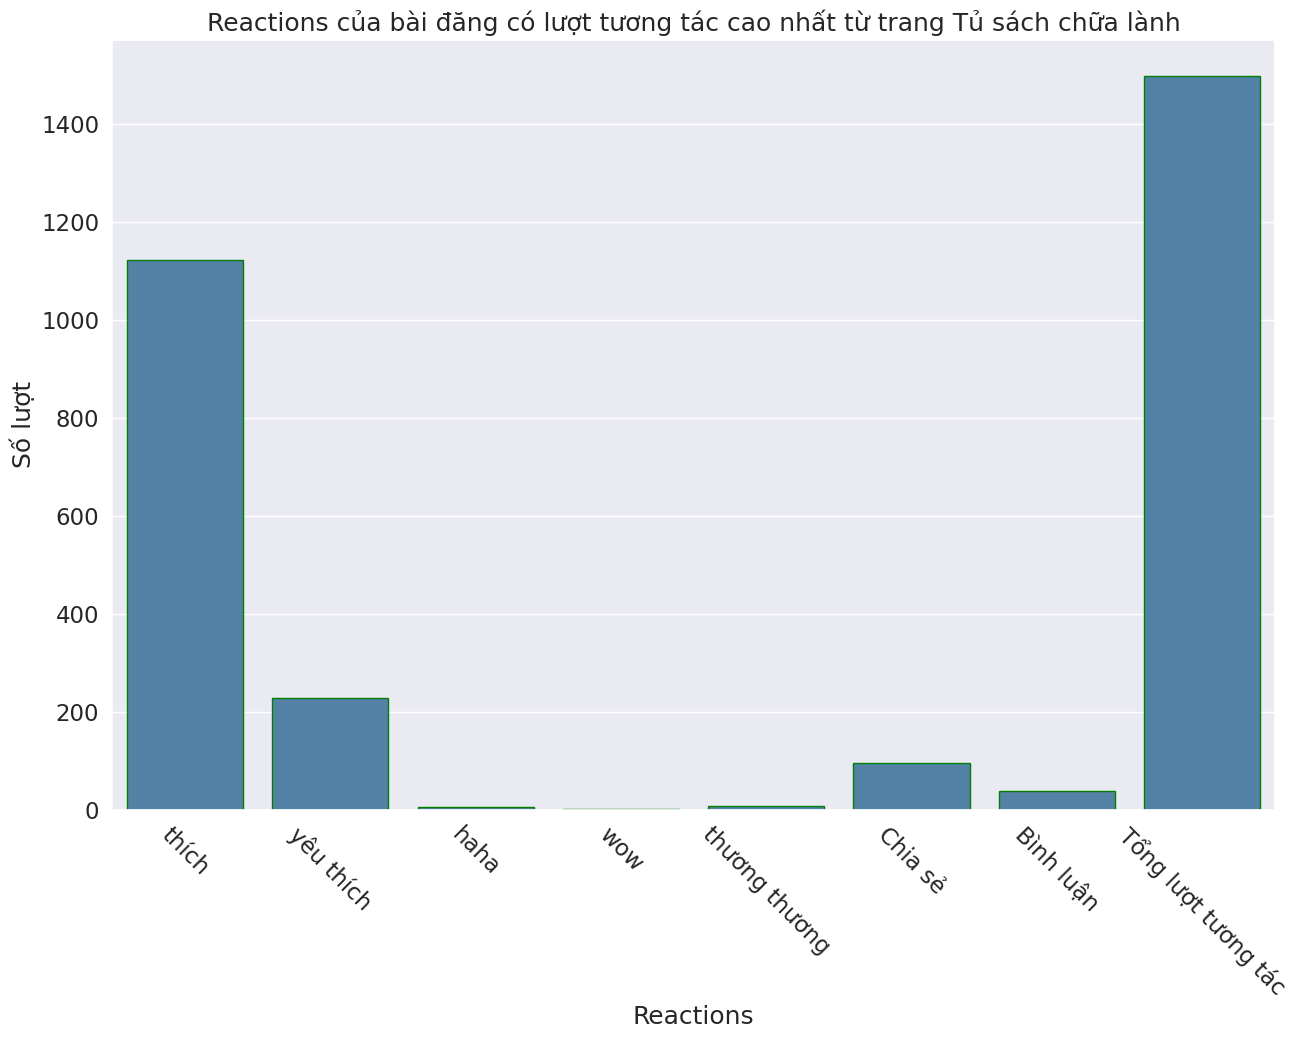

In [102]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions[index].keys()), y=list(reactions[index].values()), color = 'steelblue', edgecolor='green')
ax.set_title("Reactions của bài đăng có lượt tương tác cao nhất từ trang Tủ sách chữa lành")
ax.set_ylabel("Số lượt")
ax.set_xlabel("Reactions")
plt.xticks(rotation=-45)
plt.show()

#### Số lượt tương tác trong các bài đăng thay đổi như thế nào?

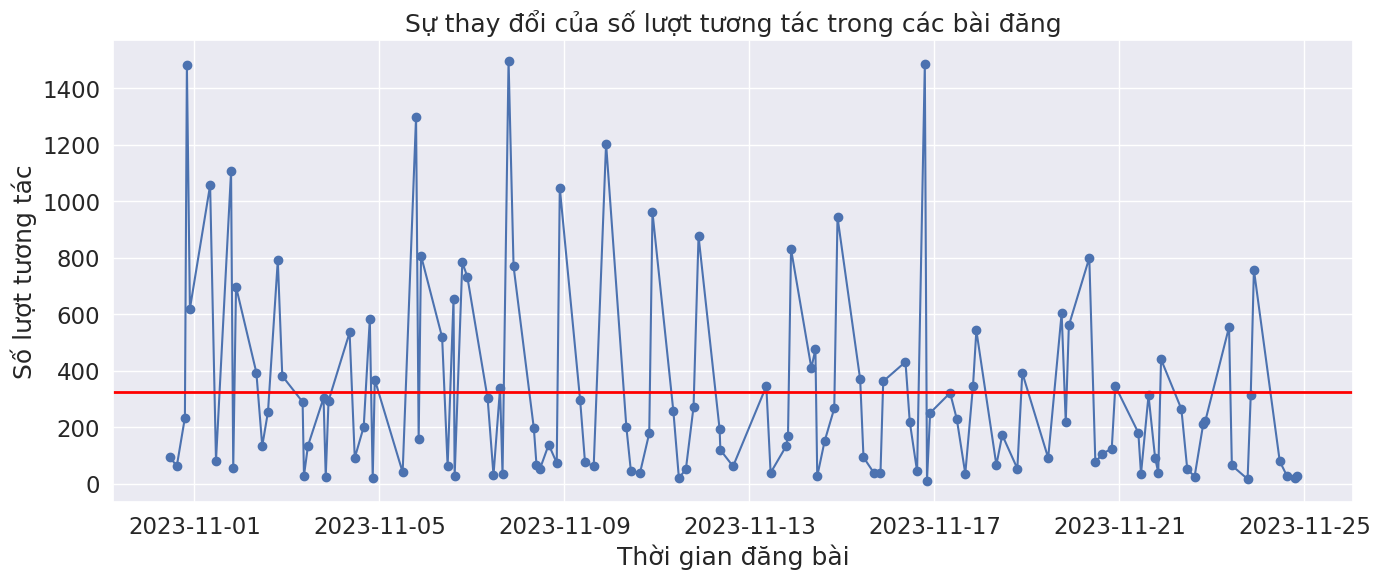

In [103]:
plt.figure(figsize=(16, 6))
plt.plot(reactions_df['time'], reactions_df['Tổng lượt tương tác'], marker='o', color='b')
plt.xlabel('Thời gian đăng bài')
plt.ylabel('Số lượt tương tác')
plt.title('Sự thay đổi của số lượt tương tác trong các bài đăng')
plt.grid(True)
plt.axhline(reactions_df['Tổng lượt tương tác'].mean(), color='red', linewidth=2, label='Trung vị')
plt.show()

#### Sự tương quan giữa số lượng reactions, bình luận và độ dài nội dung bài viết

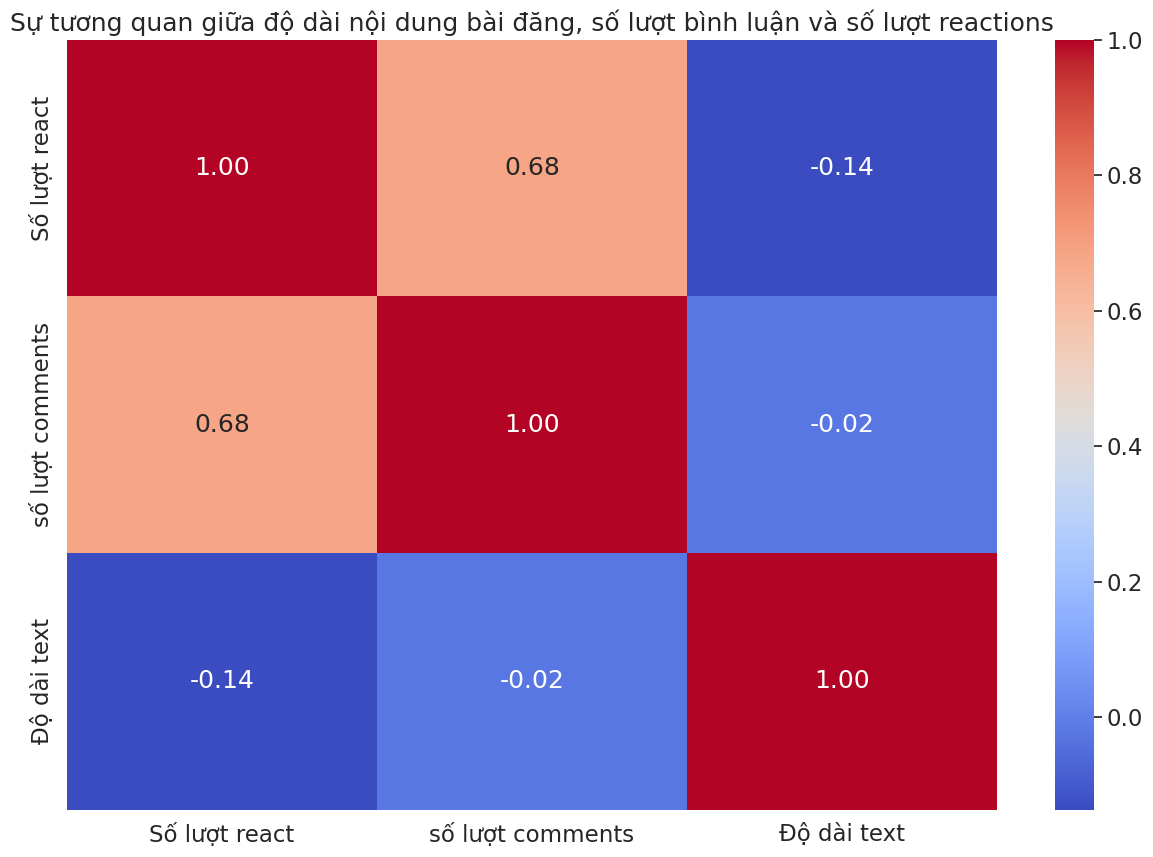

<Figure size 600x600 with 0 Axes>

In [104]:
df['len_text'] = df['post_text'].apply(lambda x: len(x.split()))
columns = ['reaction_count', 'comments', 'len_text']
correlation = df[columns].corr()
correlation.columns = ['Số lượt react','số lượt comments','Độ dài text']
correlation.index = ['Số lượt react','số lượt comments','Độ dài text']
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sự tương quan giữa độ dài nội dung bài đăng, số lượt bình luận và số lượt reactions')
plt.figure(figsize=(6,6))
plt.show()


## Phân tích nội dung bài đăng

#### Đâu là từ khóa xuất hiện nhiều nhất trong các bài đăng thu thập được?

In [105]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text

,post_id,post_text
0,358254843456044,"Người hiểu nhân quả sẽ cẩn trọng từng bước đi,..."
1,358150516799810,Người âm thầm nỗ lực đáng sợ đến thế nào?\r\n\...
2,358121806802681,Xin đừng thêm mắm muối\r\nVào câu chuyện làm q...
3,357484790199716,"Có một câu nói mà gần đây tôi rất thấm thía: ""..."
4,357485603532968,"Sau khi nhìn mèo nhà mình, mình quyết tâm phải..."
...,...,...
121,344583961489799,Vậy là chỉ còn 2 tháng nữa là hết năm. Người t...
122,345313688083493,"Xin hãy nhớ rằng, vận mệnh không phải là không..."
123,345132438101618,Tôi không còn cảm thấy quá muộn phiền khi một ...
124,345118484769680,"/ càng nâng cao nhận thức, càng bớt đi nỗi sợ ..."


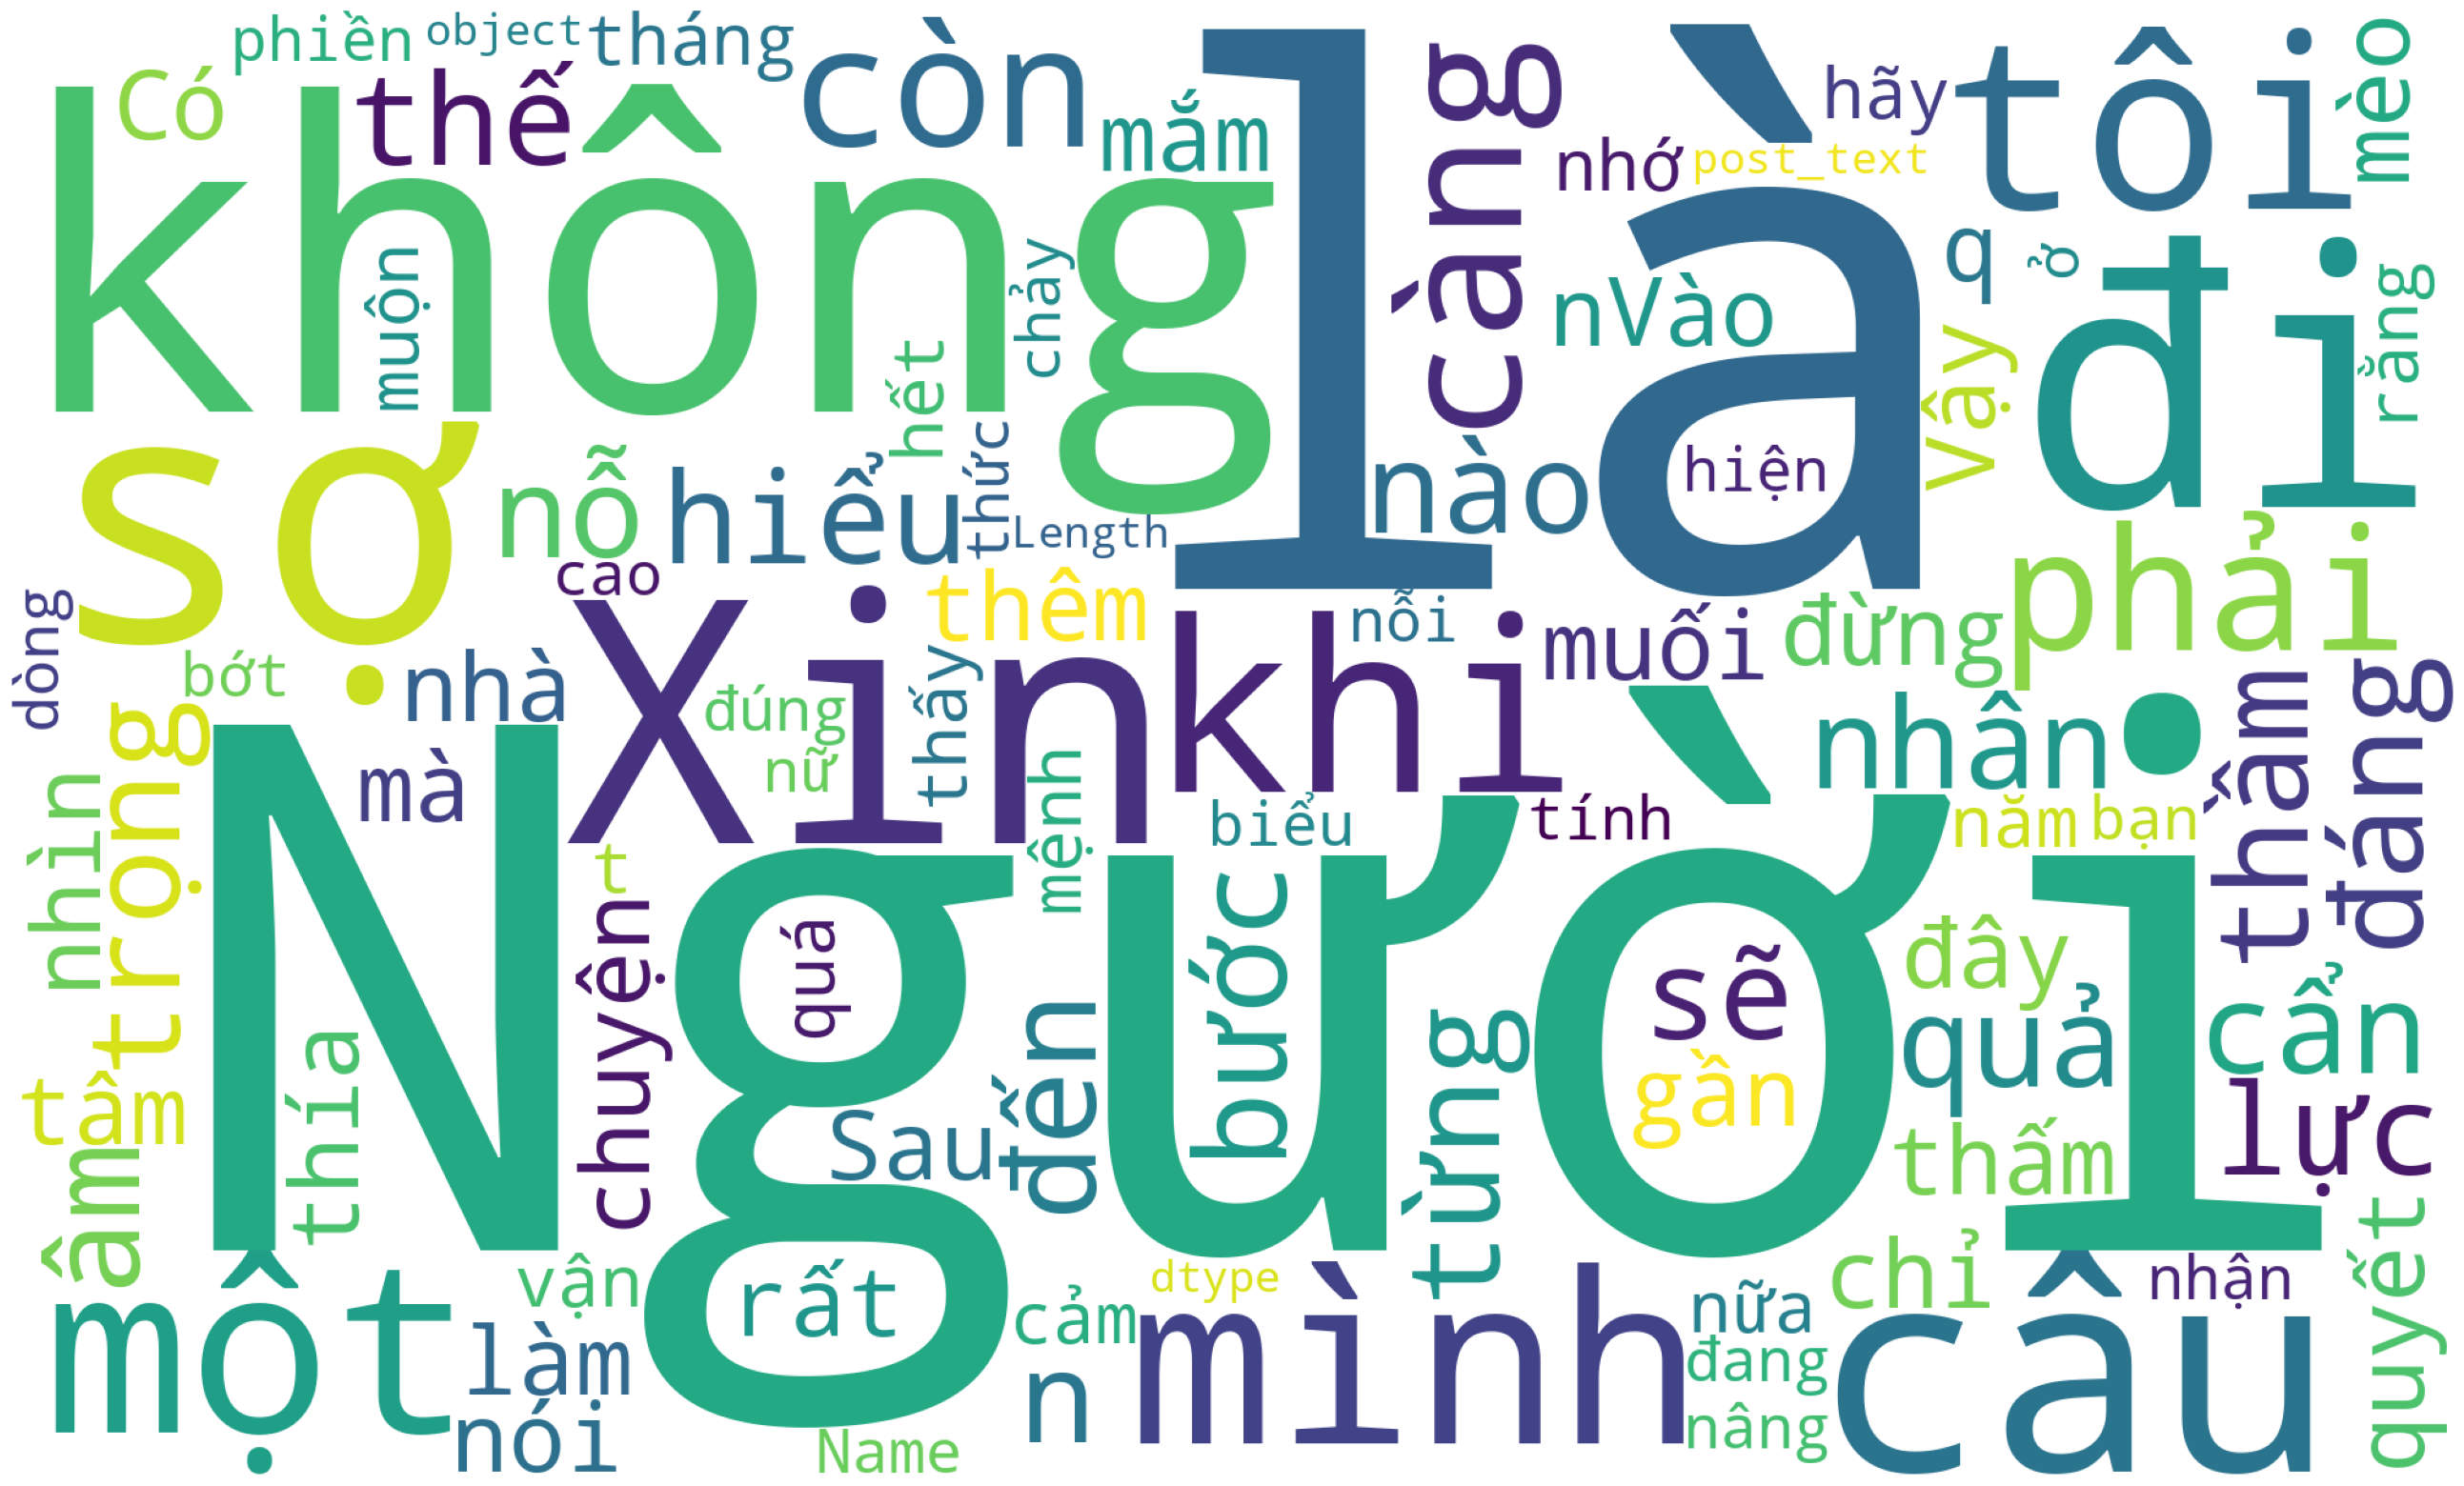

In [106]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

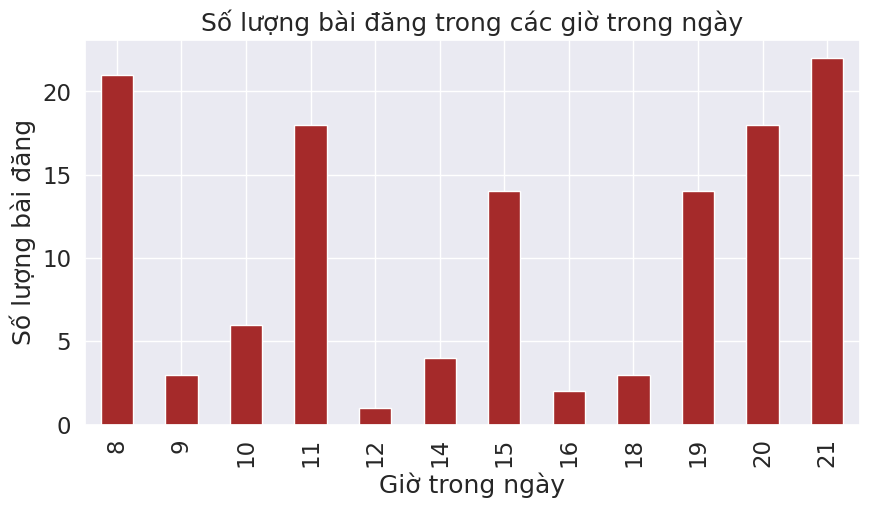

In [107]:
df['hour'] = df['time'].dt.hour
post_count = df.groupby('hour').size()
post_count.plot(kind='bar', figsize=(10,5), color = 'brown')
plt.title('Số lượng bài đăng trong các giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng bài đăng')
plt.show()

#### Tương quan giữa các mốc thời gian đăng bài và số lượt tương tác

/tmp/ipykernel_16923/3078451126.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['hour'], df['reaction_count'],color = 'steelblue', edgecolor='green', alpha=0.5, cmap='Spectral')


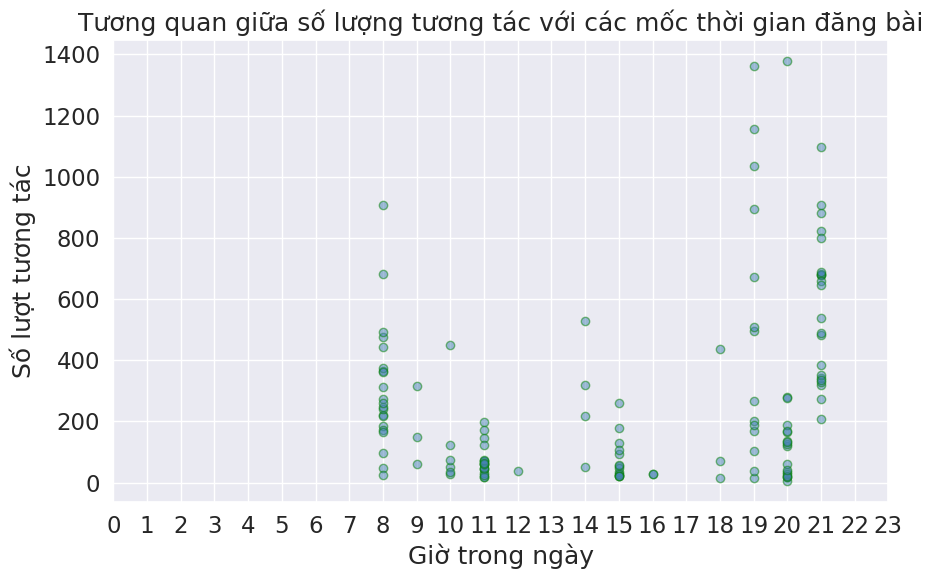

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(df['hour'], df['reaction_count'],color = 'steelblue', edgecolor='green', alpha=0.5, cmap='Spectral')
plt.title('Tương quan giữa số lượng tương tác với các mốc thời gian đăng bài')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượt tương tác')
plt.xticks(range(24))
plt.show()

### Dự đoán số lượt tương tác dựa trên thời gian đăng bài (giờ trong ngày)

In [109]:
df['total'] = df['reaction_count'] + df['comments'] + df['shares']

In [110]:
X = df[['hour']]
y = df['total']

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([ 93.5       , 620.        , 620.        , 138.        ,
       620.        ,  93.5       , 158.        , 626.8       ,
       626.8       , 411.75      ,  93.5       , 411.75      ,
       620.        , 626.8       , 138.        , 309.5       ,
       620.        , 411.75      , 411.75      , 158.        ,
       411.75      , 620.        , 626.8       ,  82.30769231,
       138.        ,  93.5       ])

In [136]:
time1 = pd.to_datetime('2023-12-02 21:00:00')
time2 = pd.to_datetime('2023-12-02 10:30:00')

hour1 = time1.hour
hour2 = time2.hour

new_df1 = pd.DataFrame({'time': [time1], 'hour': [hour1]})
new_df2 = pd.DataFrame({'time': [time2], 'hour': [hour2]})

interact_pred_1 = model.predict(new_df1)
interact_pred_2 = model.predict(new_df2)

print('Dự đoán số lượt tương tác của bài viết mới (21 giờ):', interact_pred_1[0])
print('Dự đoán số lượt tương tác của bài viết mới (10 giờ):', interact_pred_2[0])

Dự đoán số lượt tương tác của bài viết mới (21 giờ): 620.0000000000001
Dự đoán số lượt tương tác của bài viết mới (10 giờ): 138.3333333333333


## Phân tích bình luận

Để dễ dàng phân tích hơn, ta tiến hành xử lý và tổ chức lại dữ liệu của bình luận đã thu thập về.

In [113]:
# Sửa chuỗi đã thu thập về ở cột comments_full cho đúng định dạng JSON
import ast

df['comments_full'] = df['comments_full'].replace('None', '[]')
df['comments_full'] = df['comments_full'].replace("'", "\"")

In [114]:
# Chuyển cột comments_full thành một list các dataFrame mới
comment = []

for i in range(len(df)):
    c = ast.literal_eval(df['comments_full'].iloc[i])
    df_comment = pd.DataFrame(c)
    df_comment['post_id'] = df['post_id'].iloc[i]
    comment.append(df_comment)

for i in range(len(comment)):
    if all(col in comment[i].columns for col in ['comment_image', 'comment_reactors', 
                                                 'comment_reactions', 'comment_reaction_count', 'replies']):
        comment[i] = comment[i].drop(columns=['comment_image', 'comment_reactors', 
                                              'comment_reactions', 'comment_reaction_count', 'replies'])


In [115]:
# Chuyển list các dataFrame thành một dataFrame
comment_df = pd.concat(comment)
comment_df = comment_df.reset_index(drop=True)

#### Ai là người đóng góp nhiều nhất?

In [117]:
top = comment_df['commenter_name'].value_counts().head()
top

commenter_name
Trần Ngọc Diệp    69
Lê Hương Thảo     10
Hiền Ly            7
Phuong Ngo         5
Tran Ng            5
Name: count, dtype: int64

In [118]:
first = comment_df.loc[comment_df['commenter_name'] == 'Trần Ngọc Diệp'].iloc[0]
first[['commenter_id','commenter_url','commenter_name','commenter_meta']]


commenter_id                                        100075473703545
commenter_url     https://facebook.com/profile.php?id=1000754737...
commenter_name                                       Trần Ngọc Diệp
commenter_meta                                             Fan cứng
Name: 97, dtype: object

#### Số lượng bình luận của Fan cứng và Non-Fan như thế nào trong mỗi bài viết?

In [119]:
# Tạo dataFrame mới chứa thông tin về số lượng bình luận của fan và non-fan
group = comment_df.groupby('post_id')['commenter_meta'].apply(list).reset_index()
group['time'] = df['time']

def count_values(commenter_meta_list, value):
    return sum(1 for item in commenter_meta_list if item == value)

group['Fan'] = group['commenter_meta'].apply(lambda x: count_values(x, 'Fan cứng'))
group['NonFan'] = group['commenter_meta'].apply(lambda x: count_values(x, None))

group

,post_id,commenter_meta,time,Fan,NonFan
0,344583961489799,"[None, None, None, None, None, None, None, Non...",2023-11-24 20:08:26,0,10
1,344715574809971,"[Fan cứng, Fan cứng, None]",2023-11-24 19:00:06,2,1
2,344724164809112,"[Fan cứng, None, None, Fan cứng, None, None, F...",2023-11-24 15:00:08,5,11
3,345110781437117,"[Fan cứng, None]",2023-11-24 11:11:01,1,1
4,345118484769680,"[Fan cứng, None]",2023-11-23 21:46:00,1,1
...,...,...,...,...,...
99,357476293533899,"[None, None]",2023-11-04 21:35:01,0,2
100,357484790199716,[None],2023-11-04 20:30:46,0,1
101,357485603532968,"[None, None, Fan cứng, None, None, None, None,...",2023-11-04 19:00:00,1,24
102,357515443529984,"[None, None, Fan cứng, None, None]",2023-11-04 15:50:26,1,4


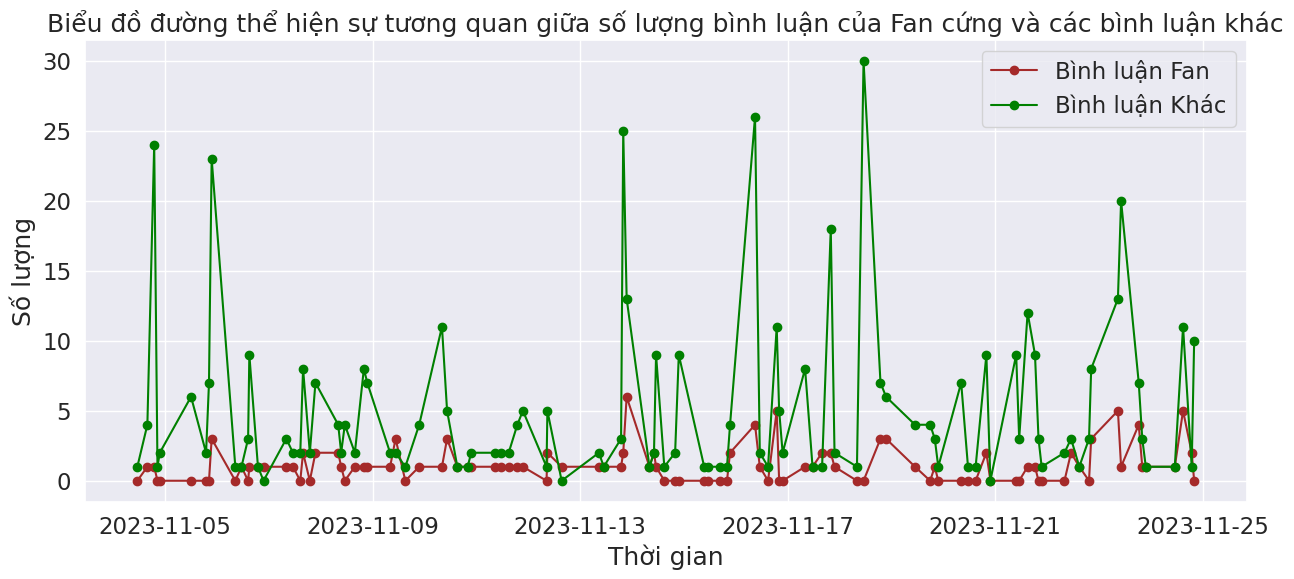

In [120]:
plt.figure(figsize=(15, 6))
plt.plot(group['time'], group['Fan'], color='brown', marker='o', label='Bình luận Fan')
plt.plot(group['time'], group['NonFan'], color='green', marker='o', label='Bình luận Khác')
plt.title('Biểu đồ đường thể hiện sự tương quan giữa số lượng bình luận của Fan cứng và các bình luận khác')
plt.ylabel('Số lượng')
plt.xlabel('Thời gian')

plt.legend()

plt.show()